<a href="https://colab.research.google.com/github/Manu-Gr/Hierarchical-CLustering-Assignment-Crime-Dataset/blob/main/Hierarchical_Clustering_Assignment_Crime_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Hierarchical Clustering - Asssignment - Crime Dataset**

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
#Read the dataset

crime = pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime1= crime.rename({'Unnamed: 0':'City'},axis=1)
crime1

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime2 = crime1.drop(['City'],axis=1)
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
# Normalization function 
crime_norm =pd.DataFrame(normalize(crime2),columns=crime2.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


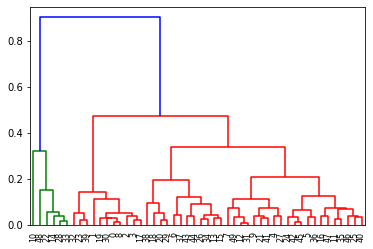

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='complete'))

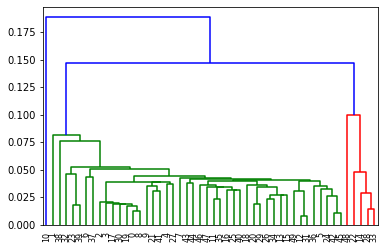

In [9]:
# create dendrogram
dendrogram1 = sch.dendrogram(sch.linkage(crime_norm, method='single'))

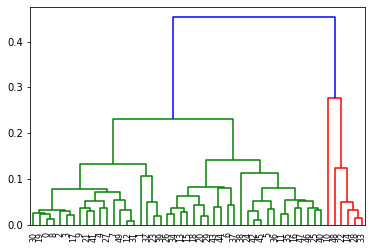

In [10]:
# create dendrogram
dendrogram2 = sch.dendrogram(sch.linkage(crime_norm, method='average'))

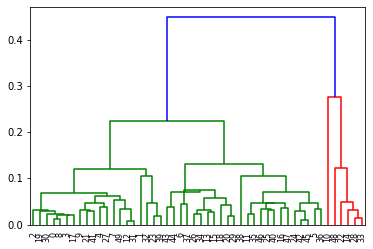

In [11]:
# create dendrogram
dendrogram3 = sch.dendrogram(sch.linkage(crime_norm, method='centroid'))

In [ ]:
# create clusters
hclusters = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [ ]:

y=pd.DataFrame(hclusters.fit_predict(crime_norm),columns=['clustersid'])
y['clustersid'].value_counts()

0    20
3    12
1    12
2     5
4     1
Name: clustersid, dtype: int64

In [ ]:
# Adding clusters to dataset
crime2['clustersid']=hclusters.labels_
crime2

,Murder,Assault,UrbanPop,Rape,clustersid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,3
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [ ]:
# Group data by Clusters (K=5)
crime2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,11.760000,255.550000,66.100000,27.090000
1,1,4.758333,116.583333,70.083333,15.683333
2,2,2.080000,56.600000,57.800000,10.760000
3,3,6.783333,141.583333,61.833333,21.466667
4,4,5.300000,46.000000,83.000000,20.200000


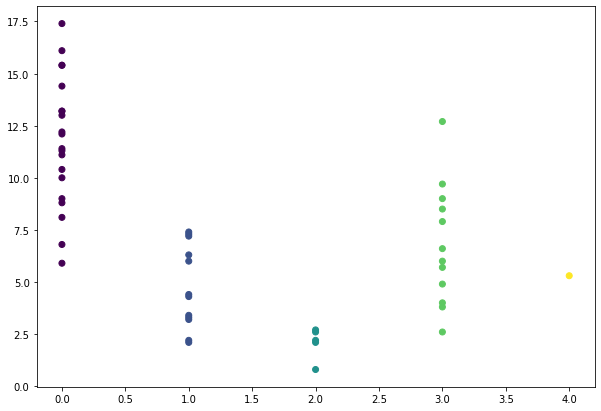

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime2['clustersid'],crime2['Murder'], c=hclusters.labels_) 

In [ ]:
crime1['clustersid']=hclusters.labels_
crime1

,City,Murder,Assault,UrbanPop,Rape,clustersid
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


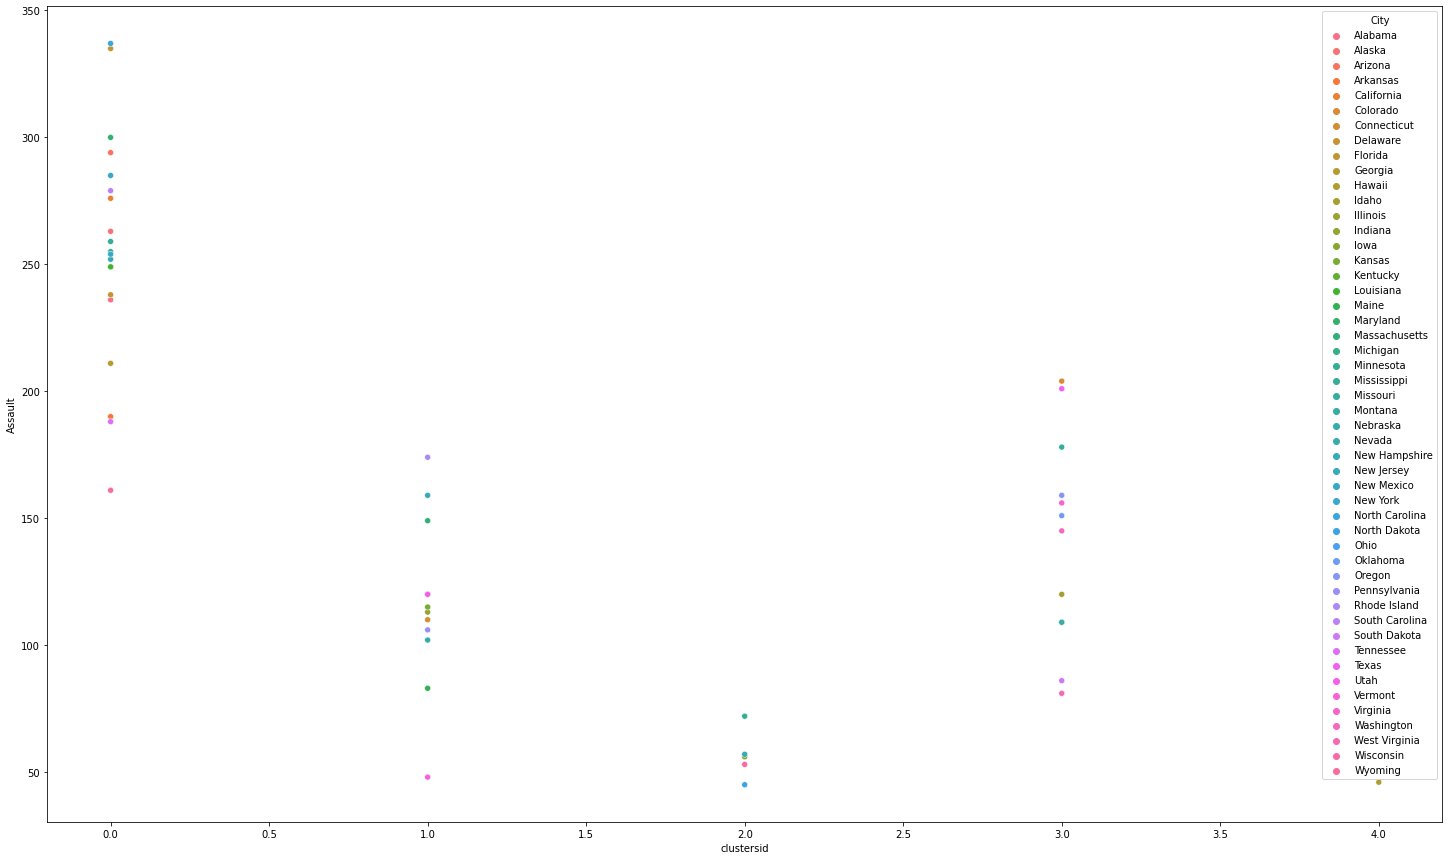

In [ ]:
# Plot Clusters for city

plt.figure(figsize=(25, 15))
sns.scatterplot(data=crime1,x="clustersid",y="Assault",hue="City")